### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [3]:
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [4]:
application_df.drop(application_df[application_df.SPECIAL_CONSIDERATIONS == 'Y'].index, inplace=True)
#application_df.drop(application_df[application_df.STATUS == 0].index, inplace=True)

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME','SPECIAL_CONSIDERATIONS'])

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8741
IS_SUCCESSFUL          2
dtype: int64

In [7]:
application_df["IS_SUCCESSFUL"]

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34272, dtype: int64

In [8]:
ask_counts = application_df["ASK_AMT"].value_counts()
ask_counts

5000        25378
6725            3
15583           3
63981           3
10478           3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8741, dtype: int64

In [9]:
# Dropping
application_df.drop(application_df[application_df.ASK_AMT > 99000000].index, inplace=True)
application_df.drop(application_df[application_df.ASK_AMT < 1].index, inplace=True)
    
application_df.ASK_AMT.value_counts()

5000        25378
63981           3
15583           3
6725            3
10478           3
            ...  
5758045         1
1806891         1
26087139        1
818340          1
36500179        1
Name: ASK_AMT, Length: 8640, dtype: int64

In [10]:
ask_counts = application_df["ASK_AMT"]
ask_counts

0            5000
1          108590
2            5000
3            6692
4          142590
           ...   
34294        5000
34295        5000
34296        5000
34297        5000
34298    36500179
Name: ASK_AMT, Length: 34171, dtype: int64

In [11]:
ask_counts = application_df["ASK_AMT"]
ask_counts

0            5000
1          108590
2            5000
3            6692
4          142590
           ...   
34294        5000
34295        5000
34296        5000
34297        5000
34298    36500179
Name: ASK_AMT, Length: 34171, dtype: int64

In [12]:
# Look at APPLICATION_TYPE value counts for binning
appt_counts = application_df["APPLICATION_TYPE"].value_counts()
appt_counts

T3     26918
T4      1542
T6      1216
T5      1172
T19     1065
T8       737
T7       725
T10      528
T9       151
T13       66
T12       26
T2        16
T25        3
T29        2
T15        2
T14        1
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

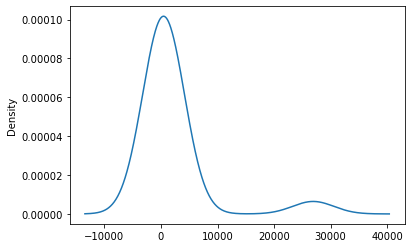

In [13]:
# Visualize the value counts of APPLICATION_TYPE
appt_counts.plot.density()

In [14]:
# Determine which values to replace if counts are less than ...?
replace_application = list(appt_counts[appt_counts < 150].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       26918
T4        1542
T6        1216
T5        1172
T19       1065
T8         737
T7         725
T10        528
T9         151
Other      117
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
classi_counts = application_df["CLASSIFICATION"].value_counts()
classi_counts

C1000    17241
C2000     6055
C1200     4822
C3000     1917
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

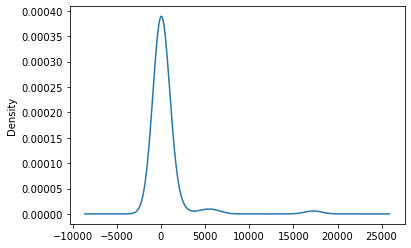

In [16]:
# Visualize the value counts of CLASSIFICATION
classi_counts.plot.density()

In [17]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classi_counts[classi_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17241
C2000     6055
C1200     4822
Other     2253
C3000     1917
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Kyle\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Kyle\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

C:\Users\Kyle\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3440      
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 dense_2 (Dense)             (None, 4)                 84        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,149
Trainable params: 5,149
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/Optweights.{epoch:02d}.hdf5"

In [26]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=120,callbacks=[cp_callback])

Epoch 1/120
798/798 [==============================] - 1s 770us/step - loss: 0.7002 - accuracy: 0.5198
Epoch 2/120
798/798 [==============================] - 1s 702us/step - loss: 0.6889 - accuracy: 0.5420
Epoch 3/120
798/798 [==============================] - 1s 698us/step - loss: 0.6883 - accuracy: 0.5468
Epoch 4/120
798/798 [==============================] - 1s 701us/step - loss: 0.6875 - accuracy: 0.5489
Epoch 5/120
775/798 [============================>.] - ETA: 0s - loss: 0.6869 - accuracy: 0.5492
Epoch 00005: saving model to checkpoints\Optweights.05.hdf5
798/798 [==============================] - 1s 733us/step - loss: 0.6870 - accuracy: 0.5485
Epoch 6/120
798/798 [==============================] - 1s 697us/step - loss: 0.6866 - accuracy: 0.5514
Epoch 7/120
798/798 [==============================] - 1s 785us/step - loss: 0.6860 - accuracy: 0.5525
Epoch 8/120
798/798 [==============================] - 1s 800us/step - loss: 0.6857 - accuracy: 0.5509
Epoch 9/120
798/798 [==========

798/798 [==============================] - 1s 717us/step - loss: 0.6770 - accuracy: 0.5642
Epoch 64/120
798/798 [==============================] - 1s 705us/step - loss: 0.6765 - accuracy: 0.5615
Epoch 65/120
738/798 [==========================>...] - ETA: 0s - loss: 0.6759 - accuracy: 0.5636
Epoch 00065: saving model to checkpoints\Optweights.65.hdf5
798/798 [==============================] - 1s 698us/step - loss: 0.6758 - accuracy: 0.5639
Epoch 66/120
798/798 [==============================] - 1s 693us/step - loss: 0.6763 - accuracy: 0.5632
Epoch 67/120
798/798 [==============================] - 1s 721us/step - loss: 0.6761 - accuracy: 0.5638
Epoch 68/120
798/798 [==============================] - 1s 759us/step - loss: 0.6760 - accuracy: 0.5639
Epoch 69/120
798/798 [==============================] - 1s 734us/step - loss: 0.6757 - accuracy: 0.5644
Epoch 70/120
790/798 [============================>.] - ETA: 0s - loss: 0.6759 - accuracy: 0.5655
Epoch 00070: saving model to checkpoints\O

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

266/266 - 0s - loss: 0.7025 - accuracy: 0.5482 - 468ms/epoch - 2ms/step
Loss: 0.7024621367454529, Accuracy: 0.5481672883033752


In [29]:
nn.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:xlabel='IS_SUCCESSFUL', ylabel='ASK_AMT'>

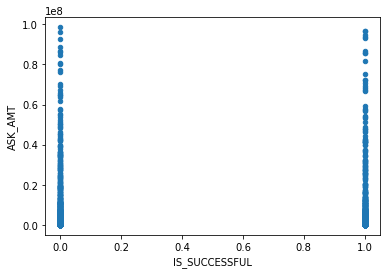

In [32]:
application_df.plot.scatter(x="IS_SUCCESSFUL", y="ASK_AMT", colormap="winter")